In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [36]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [37]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [38]:
Y_train

array([8, 0, 5, ..., 6, 0, 8])

In [39]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [40]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [41]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[5 3 3 ... 6 5 6] [8 0 5 ... 6 0 8]
0.1011219512195122
Iteration:  10
[5 4 3 ... 6 4 6] [8 0 5 ... 6 0 8]
0.12973170731707317
Iteration:  20
[5 4 0 ... 6 4 6] [8 0 5 ... 6 0 8]
0.17302439024390243
Iteration:  30
[4 4 0 ... 6 4 6] [8 0 5 ... 6 0 8]
0.20039024390243904
Iteration:  40
[4 0 0 ... 6 4 6] [8 0 5 ... 6 0 8]
0.22921951219512196
Iteration:  50
[4 0 0 ... 6 0 6] [8 0 5 ... 6 0 8]
0.26509756097560977
Iteration:  60
[5 0 0 ... 6 0 6] [8 0 5 ... 6 0 8]
0.30778048780487804
Iteration:  70
[5 0 0 ... 6 3 0] [8 0 5 ... 6 0 8]
0.35385365853658535
Iteration:  80
[5 0 0 ... 6 3 0] [8 0 5 ... 6 0 8]
0.4036829268292683
Iteration:  90
[5 0 3 ... 6 3 3] [8 0 5 ... 6 0 8]
0.45202439024390245
Iteration:  100
[3 3 3 ... 6 3 3] [8 0 5 ... 6 0 8]
0.49709756097560975
Iteration:  110
[3 3 3 ... 6 3 3] [8 0 5 ... 6 0 8]
0.5328536585365854
Iteration:  120
[3 3 3 ... 6 3 3] [8 0 5 ... 6 0 8]
0.5623902439024391
Iteration:  130
[3 3 3 ... 6 3 3] [8 0 5 ... 6 0 8]
0.586390243902439
Iteration

In [42]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [0]
Label:  8


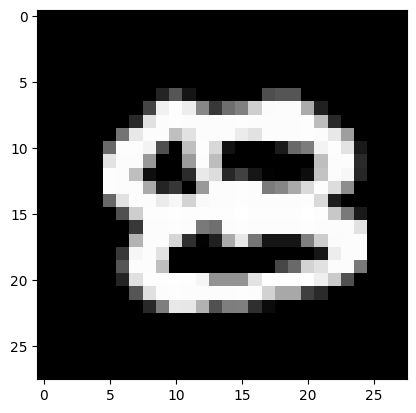

Prediction:  [3]
Label:  0


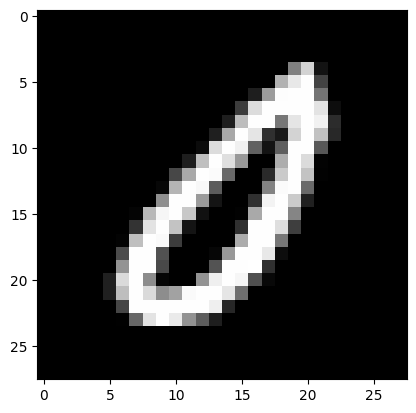

Prediction:  [5]
Label:  5


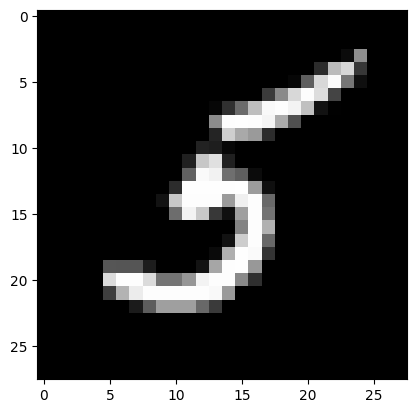

Prediction:  [9]
Label:  4


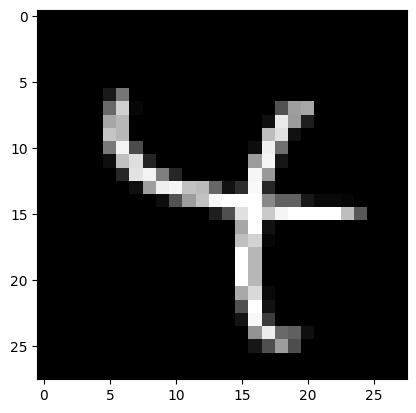

Prediction:  [0]
Label:  0


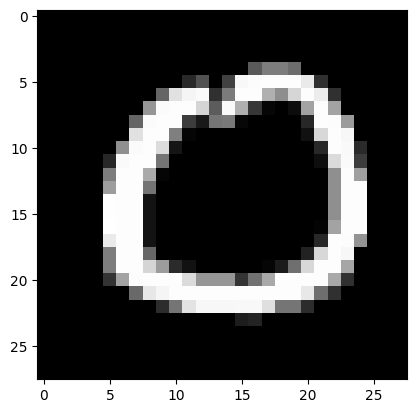

Prediction:  [0]
Label:  0


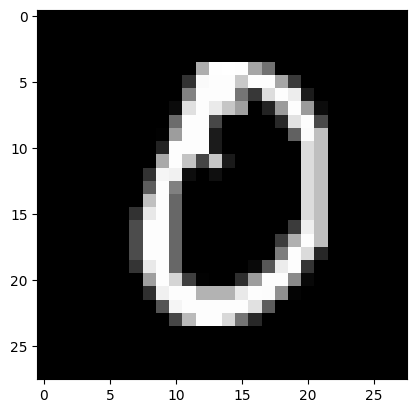

Prediction:  [1]
Label:  4


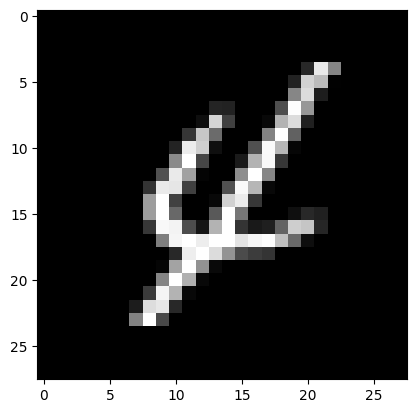

Prediction:  [9]
Label:  9


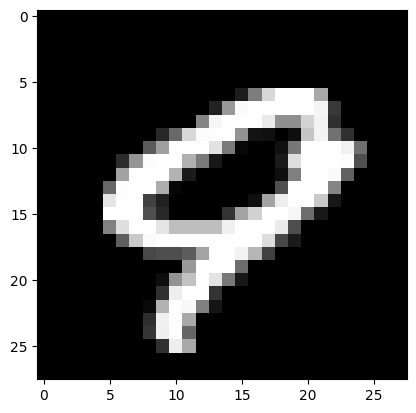

Prediction:  [1]
Label:  1


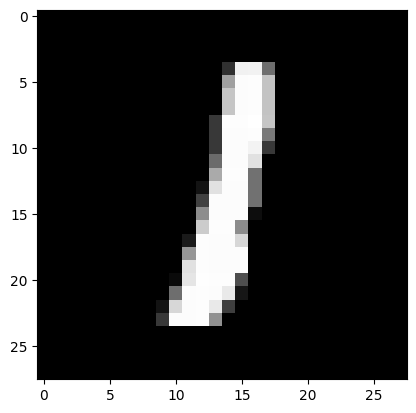

Prediction:  [0]
Label:  0


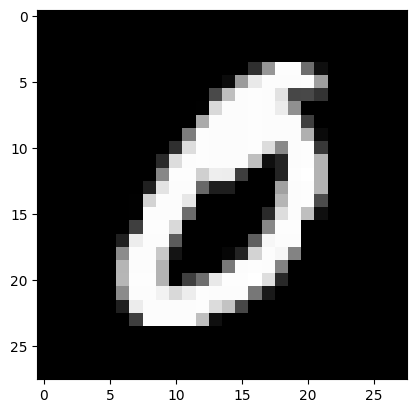

Prediction:  [7]
Label:  9


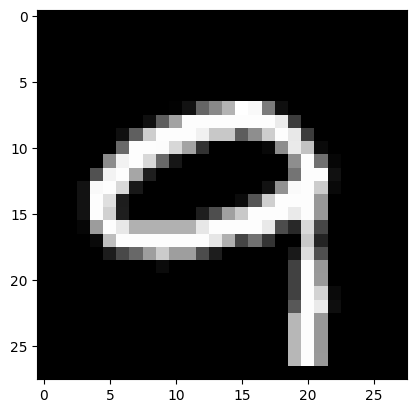

Prediction:  [0]
Label:  0


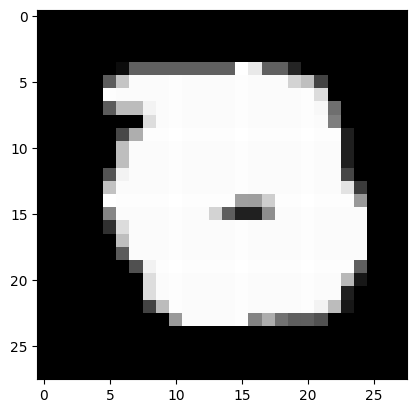

Prediction:  [9]
Label:  9


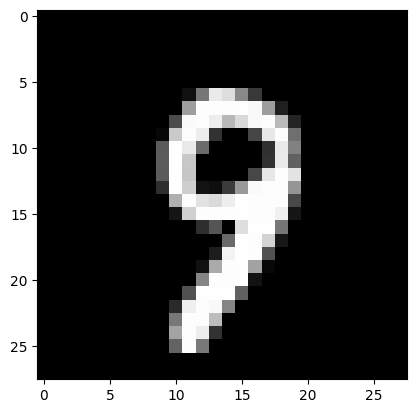

Prediction:  [3]
Label:  3


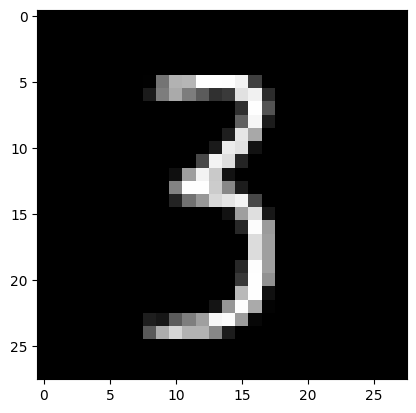

Prediction:  [2]
Label:  2


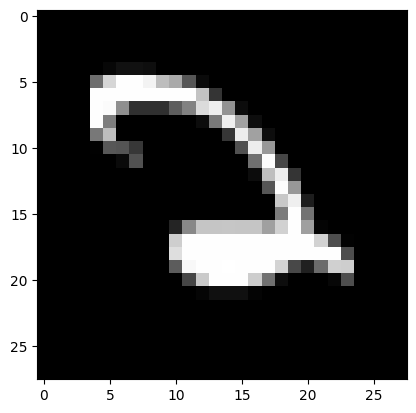

Prediction:  [8]
Label:  8


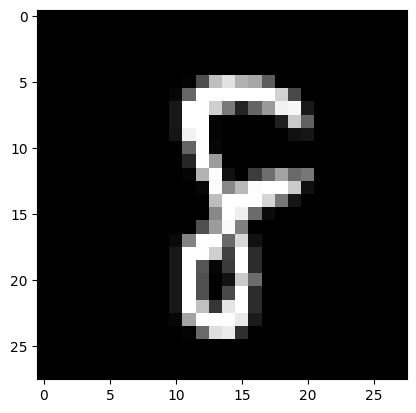

Prediction:  [1]
Label:  1


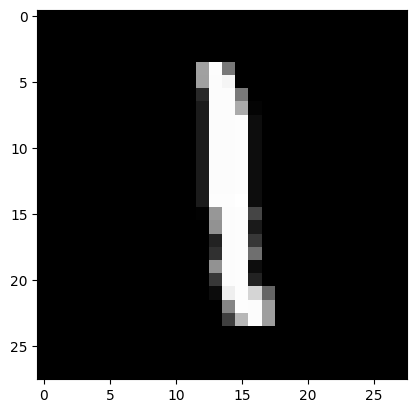

Prediction:  [4]
Label:  4


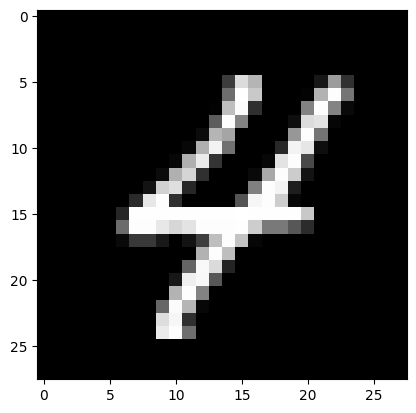

Prediction:  [4]
Label:  4


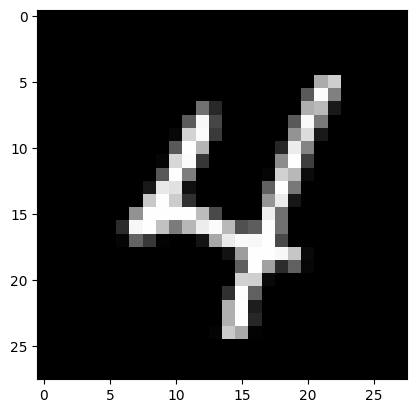

Prediction:  [7]
Label:  7


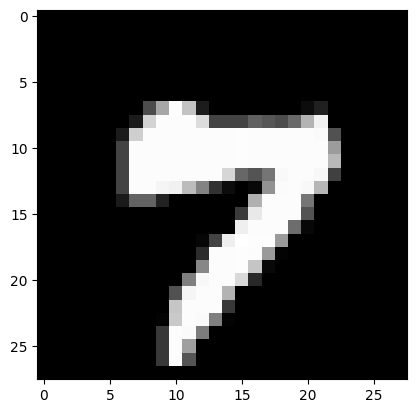

Prediction:  [5]
Label:  5


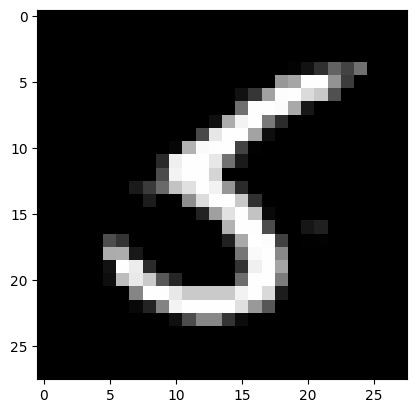

In [43]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)
test_prediction(4, W1, b1, W2, b2)
test_prediction(5, W1, b1, W2, b2)
test_prediction(6, W1, b1, W2, b2)
test_prediction(7, W1, b1, W2, b2)
test_prediction(8, W1, b1, W2, b2)
test_prediction(9, W1, b1, W2, b2)
test_prediction(10, W1, b1, W2, b2)
test_prediction(11, W1, b1, W2, b2)
test_prediction(12, W1, b1, W2, b2)
test_prediction(13, W1, b1, W2, b2)
test_prediction(14, W1, b1, W2, b2)
test_prediction(15, W1, b1, W2, b2)
test_prediction(16, W1, b1, W2, b2)
test_prediction(17, W1, b1, W2, b2)
test_prediction(18, W1, b1, W2, b2)
test_prediction(19, W1, b1, W2, b2)
test_prediction(20, W1, b1, W2, b2)

In [44]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[7 8 8 9 2 1 2 7 8 9 6 0 2 5 8 8 2 0 8 2 1 6 8 5 9 1 0 4 0 2 1 9 4 5 4 1 6
 2 0 6 1 8 3 7 5 4 9 9 9 7 3 9 2 1 7 8 2 7 6 1 8 6 1 6 3 3 8 3 0 1 6 3 1 6
 1 2 9 9 3 9 8 9 1 3 8 0 2 3 7 6 8 9 3 1 6 1 2 5 0 1 5 9 2 2 7 6 4 6 3 5 3
 4 9 4 8 4 1 1 2 6 5 4 0 0 9 1 0 5 2 6 7 4 7 4 0 3 3 2 6 2 5 3 9 1 8 3 1 1
 6 8 8 6 9 9 0 4 0 6 3 7 3 4 3 5 8 9 7 1 6 1 1 0 5 0 8 9 4 7 3 5 4 0 6 2 9
 3 6 8 9 9 6 4 2 2 9 7 1 2 9 5 3 5 2 0 0 0 0 6 7 3 5 5 8 7 3 0 0 0 1 2 0 7
 0 0 9 5 1 1 6 8 1 2 4 8 5 5 6 1 4 7 9 7 2 7 6 2 6 2 5 2 2 4 2 5 4 0 0 1 9
 9 4 6 1 5 3 5 8 1 9 6 9 0 7 2 3 1 0 6 1 1 2 8 9 6 9 5 5 9 4 5 0 4 1 4 9 8
 3 6 3 8 6 7 0 9 7 8 9 9 6 3 0 6 4 2 4 7 6 2 9 7 3 2 4 2 1 6 3 5 8 0 3 6 6
 9 9 1 0 1 1 3 1 1 7 2 4 9 0 9 0 1 8 0 8 2 9 9 2 8 6 3 7 9 6 9 9 5 3 9 0 4
 0 1 0 2 4 9 0 0 1 5 7 7 9 3 4 7 9 3 4 4 3 8 2 9 8 6 1 0 6 9 9 0 7 7 9 7 6
 6 8 7 9 3 4 0 2 6 1 4 4 4 3 8 1 5 7 1 4 8 2 3 8 8 5 3 0 7 3 6 1 6 0 5 8 8
 0 8 0 8 5 7 5 3 0 3 5 6 1 4 4 2 0 0 6 7 7 2 8 3 1 1 1 8 0 0 9 0 9 5 1 2 5
 5 3 0 0 9 9 6 1 8 9 5 6 

0.848